# Reading .ROOT files outside the ROOT framework

While checking the ATLAS data structure of ROOT files (downloaded from http://opendata.cern.ch/), I tried to load, read and convert corresponding data files into NumPy arrays / Pandas dataframes.

Possible ways of reading .ROOT files:
* use ROOT to convert objects into numpy arrays (requires ROOT),
* use root_numpy or root_pandas libraries (deprecated and unmaintained),
* <b> use [uproot library](https://uproot.readthedocs.io/en/latest/) </b>,
* other ways.

### Importing libraries

In [1]:
import uproot as ur
import numpy as np
import pandas as pd

### Opening a file

In [2]:
file_root = ur.open("ATLAS_1lep1tau/Data/data_A.1lep1tau.root")

In [3]:
file_root

<ReadOnlyDirectory '/' at 0x7f18658747f0>

In [4]:
file_root.keys()

['mini;1']

In [5]:
file_root.classnames()

{'mini;1': 'TTree'}

In [6]:
data_root = file_root['mini;1']

### Shortcut

In [7]:
data_root = ur.open("ATLAS_1lep1tau/Data/data_B.1lep1tau.root")["mini;1"]

### Features

In [8]:
data_root

<TTree 'mini' (81 branches) at 0x7f1864bb4b20>

In [9]:
print(data_root.keys())

['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst', 'je

In [10]:
data_root.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_PHOTON   | float                    | AsDtype('>f4')
scaleFactor_TAU      | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_LepTR... | float                    | AsDtype('>f4')
scaleFactor_Photo... | float                    | AsDtype('>f4')
trigE                | bool                     | AsDtype(

### Creating series

In [11]:
series = data_root['lep_pt'].array(library='pd')

In [12]:
series

entry   subentry
0       0           30623.533203
1       0           25741.923828
2       0           25151.730469
3       0           25600.916016
4       0           48431.027344
                        ...     
170693  0           36389.511719
170694  0           41719.011719
170695  0           32028.734375
170696  0           37340.351562
170697  0           28852.873047
Length: 179265, dtype: float32

### Creating a dataframe with features that we are interested in

In [13]:
df = data_root.arrays(['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_TAU', 'scaleFactor_ELE', 'scaleFactor_MUON', 'trigP', 'lep_pt'], library='pd')

In [14]:
df

,,runNumber,eventNumber,channelNumber,mcWeight,scaleFactor_TAU,scaleFactor_ELE,scaleFactor_MUON,trigP,lep_pt
entry,subentry,,,,,,,,,
0,0,300784,7420417,300784,0.0,0.0,0.0,0.0,False,30623.533203
1,0,300784,6081355,300784,0.0,0.0,0.0,0.0,False,25741.923828
2,0,300784,7101133,300784,0.0,0.0,0.0,0.0,False,25151.730469
3,0,300784,7209999,300784,0.0,0.0,0.0,0.0,False,25600.916016
4,0,300784,6265888,300784,0.0,0.0,0.0,0.0,False,48431.027344
...,...,...,...,...,...,...,...,...,...,...
170693,0,300655,1651658680,300655,0.0,0.0,0.0,0.0,False,36389.511719
170694,0,300655,1651925813,300655,0.0,0.0,0.0,0.0,False,41719.011719
170695,0,300655,1651191459,300655,0.0,0.0,0.0,0.0,False,32028.734375


### Creating a dataframe with all the features in the data

In [15]:
df_full = data_root.arrays(data_root.keys(), library='pd')

### Performance

In [16]:
import time
import os

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
files = ['data_A.1lep1tau', 'data_B.1lep1tau', 'data_C.1lep1tau', 'data_D.1lep1tau', 'mc_363490.llll.1lep1tau', 'mc_363491.lllv.1lep1tau', 'mc_410000.ttbar_lep.1lep1tau']

In [19]:
def load():
    
    sizes = []
    times_np = []
    times_pd = []
    
    for file in files:
        size = np.around(os.path.getsize((f"Files/{file}.root"))/1000/1000, 0)
        sizes.append(size)
        
        data = ur.open(f"Files/{file}.root")["mini;1"]
        
        start_time1 = time.time()
        df_np = data.arrays(data.keys(), library = "np")
        time_np = np.around(time.time() - start_time1, 2)
        times_np.append(time_np)
    
        start_time2 = time.time()
        df_pd = data.arrays(data.keys(), library = "pd")
        time_pd = np.around(time.time() - start_time2, 2)
        times_pd.append(time_pd)
        
    fig = plt.figure(figsize=(24,8))
    ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

    plt.subplot(121)
    plt.title('Numpy Arrays')
    plt.xlabel('Time [s]')
    plt.ylabel('Size [Mb]')
    sns.lineplot(x=times_np, y=sizes, color='green', marker='o', markersize=12)


    plt.subplot(122)
    plt.title('Pandas Dataframes')
    plt.xlabel('Time [s]')
    plt.ylabel('Size [Mb]')
    sns.lineplot(x=times_pd, y=sizes, color='green', marker='o', markersize=12)

    plt.show()

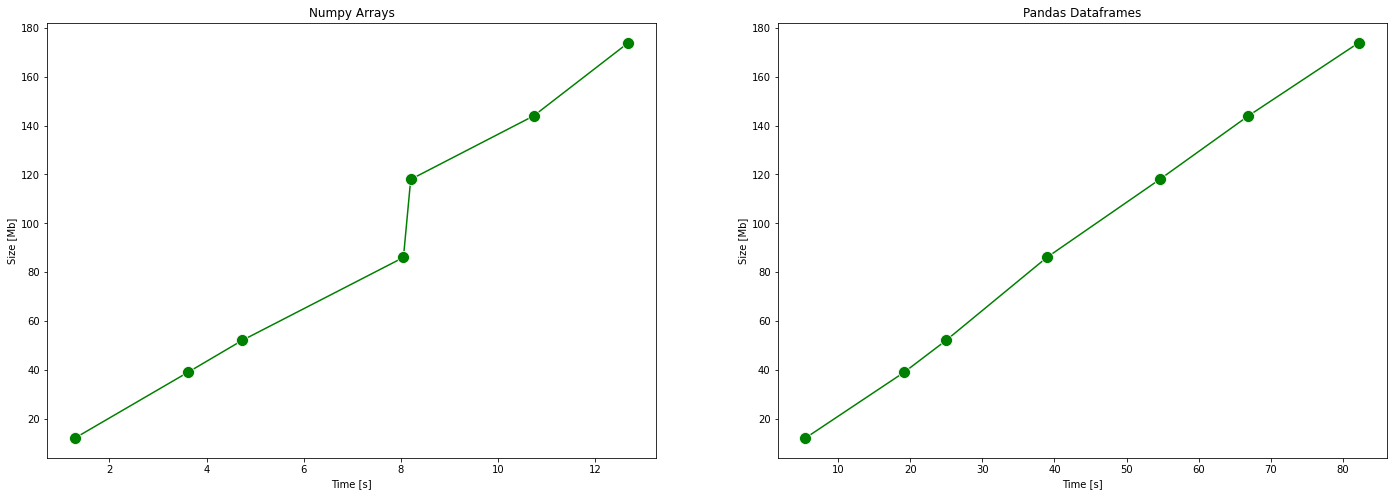

In [20]:
load()